In [1]:
### 패키지 설치

import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc #garbage collector

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools #웹 시각화 라이브러리인 d3.js 를 이용하여 보다 interactive 하게 그래프를 만들어주는 모듈.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #TfidVectorizer: Term Frequency-Inverse Document Frequency(단어 빈도- 역문서 빈도)
from sklearn.decomposition import TruncatedSVD #특이값 분해(Singular Value Decomposition, SVD)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import plotly.graph_objs as go

import time
import random


In [2]:
data = pd.read_excel('2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx')

In [3]:
data.columns = ['홍수사상번호', '연', '월', '일', '시간', '유입량', '유역평균강수_1', '강우(A지역)_1', '강우(B지역)_1', '강우(C지역)_1','강우(D지역)_1', '수위(E지역)_1', '수위(D지역)_1',
               '유역평균강수_2', '강우(A지역)_2', '강우(B지역)_2', '강우(C지역)_2','강우(D지역)_2', '수위(E지역)_2', '수위(D지역)_2',
                '유역평균강수_3', '강우(A지역)_3', '강우(B지역)_3', '강우(C지역)_3','강우(D지역)_3', '수위(E지역)_3', '수위(D지역)_3',
                '유역평균강수_4', '강우(A지역)_4', '강우(B지역)_4', '강우(C지역)_4','강우(D지역)_4', '수위(E지역)_4', '수위(D지역)_4',
                '유역평균강수_5', '강우(A지역)_5', '강우(B지역)_5', '강우(C지역)_5','강우(D지역)_5', '수위(E지역)_5', '수위(D지역)_5',
                '유역평균강수_6', '강우(A지역)_6', '강우(B지역)_6', '강우(C지역)_6','강우(D지역)_6', '수위(E지역)_6', '수위(D지역)_6',
               ]

In [4]:
data = data.drop([0])

In [5]:
data

,홍수사상번호,연,월,일,시간,유입량,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6
1,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,8,2.54,122.569,6.3,7,7,7,8,2.54,122.542,6.3,7,7,7,8,2.54,122.55,6.4,7,7,8,8,2.54,122.675,6.4,7,7,8,8,2.54,122.66,6.4,7,7,8,8,2.54,122.61
2,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,8,2.53,122.562,6.4,7,8,7,8,2.53,122.55,6.4,7,8,7,8,2.53,122.558,7.3,7,8,10,10,2.53,122.668,7.3,7,8,10,10,2.53,122.648,7.3,7,8,10,10,2.53,122.6
3,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,8,2.53,122.556,7.3,7,9,7,8,2.53,122.558,7.3,7,9,8,8,2.53,122.567,8.2,7,9,10,11,2.53,122.661,8.2,7,9,10,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59
4,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3,7,10,7,8,2.53,122.556,8.2,7,10,8,8,2.53,122.567,8.2,7,10,10,10,2.53,122.575,11.3,9,10,15,14,2.53,122.654,11.3,9,10,15,14,2.53,122.62,11.3,9,10,15,14,2.53,122.585
5,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2,7,12,8,10,2.53,122.556,11.3,9,12,10,10,2.53,122.575,11.3,9,12,10,11,2.53,122.575,14.4,12,12,18,16,2.53,122.639,14.4,12,12,18,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,26.0,2018.0,7.0,7.0,17.0,NaN,2.3689,1,0,0,0,3.16,129.994,2.3689,1,0,0,0,3.16,130.017,2.3689,1,0,0,0,3.16,130.025,2.3689,1,0,1,0,3.16,129.882,2.3689,1,0,1,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.95
3048,26.0,2018.0,7.0,7.0,18.0,NaN,2.3689,1,0,0,0,3.15,130.006,2.3689,1,0,0,0,3.15,130.025,2.3689,1,0,0,0,3.15,130.025,2.3689,1,0,1,0,3.15,129.896,2.3689,1,0,1,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.97
3049,26.0,2018.0,7.0,7.0,19.0,NaN,2.3689,1,0,0,0,3.13,130.012,2.3689,1,0,0,0,3.13,130.025,2.3689,1,0,0,0,3.13,130.025,2.3689,1,0,1,0,3.13,129.911,2.3689,1,0,1,0,3.13,129.94,2.0354,1,0,0,0,3.13,129.98
3050,26.0,2018.0,7.0,7.0,20.0,NaN,2.3689,1,0,0,0,3.11,130.019,2.3689,1,0,0,0,3.11,130.025,2.3689,1,0,0,0,3.11,130.025,2.3689,1,0,1,0,3.11,129.925,2.3488,1,0,1,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.99


In [6]:
data = data.astype('float64')

In [7]:
data['연'] = data['연'].astype('int')
data['월'] = data['월'].astype('int')
data['일'] = data['일'].astype('int')
data['시간'] = data['시간'].astype('int')

In [8]:
test = data.iloc[2891:,:]
train = data.iloc[:2891,:]

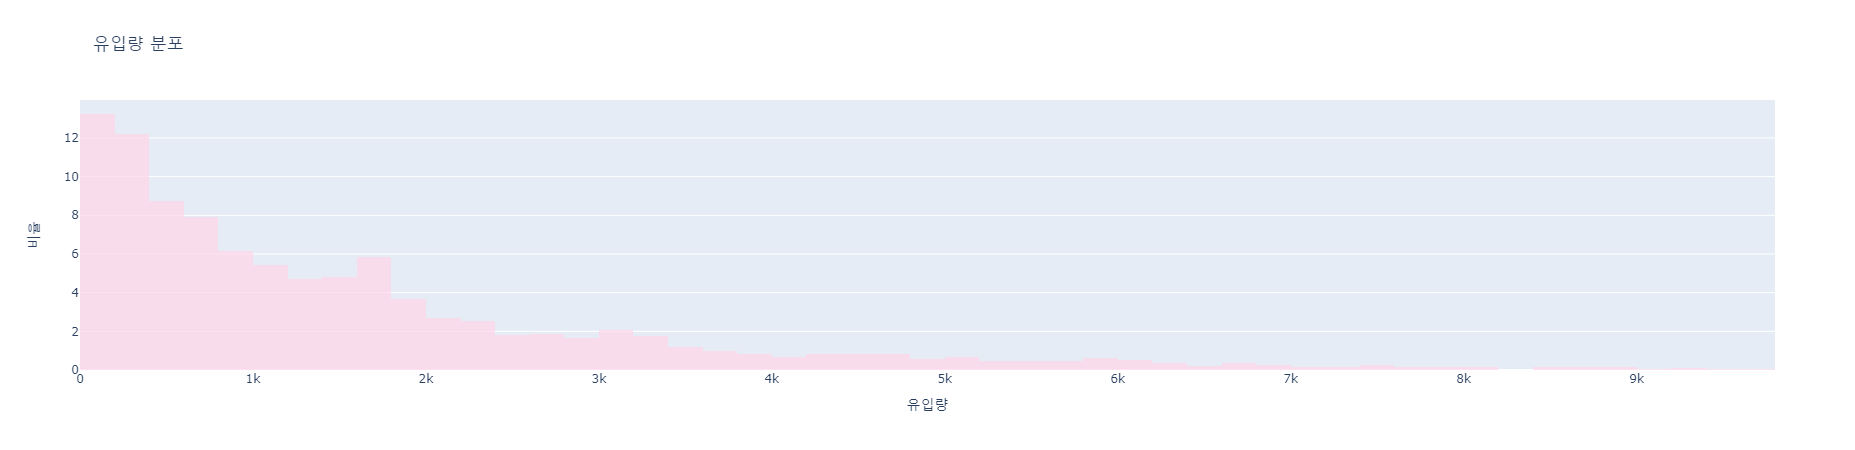

In [9]:
## histogram
trace1 = go.Histogram(
    x=train['유입량'],
    histnorm='percent',
    name='control',
    xbins=dict(
        start=0,
        end=10000,
        size=200
    ),
    marker=dict(
        color='#FFD7E9',
    ),
    opacity=0.75
)

data = [trace1]

layout = go.Layout(
    title='유입량 분포',
    xaxis=dict(
        title='유입량'
    ),
    yaxis=dict(
        title='비율'
    )
    #,
    #bargap=0.2,
    #bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

In [10]:
train.유입량.describe()

count     2891.000000
mean      1746.902717
std       2181.790290
min          3.541153
25%        384.762514
50%       1065.549253
75%       2213.014288
max      21504.402260
Name: 유입량, dtype: float64

In [11]:
h_rain = train[train['유입량']>6000] #8000이상 51개, 7000이상 75개,  6000이상 123개

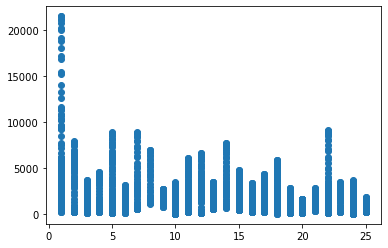

In [12]:
### 홍수의 유입량 관련 
plt.scatter(train.홍수사상번호, train.유입량)

In [13]:
np.shape(train.loc[(train['유입량']>=8000) & (train['홍수사상번호']  == 1)]) #8000이상의 데이터 51 중 32개 존재

(32, 48)

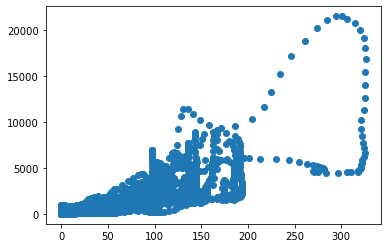

In [14]:
### 홍수의 유입량 관련 
plt.scatter(train.유역평균강수_5, train.유입량)

In [15]:
np.shape(train.loc[(train['유역평균강수_1']>=200)]) #8000이상의 데이터 51 중 32개 존재

(60, 48)

In [16]:
train.loc[(train['유역평균강수_1']>=200)].describe()

,홍수사상번호,연,월,일,시간,유입량,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6
count,60.0,60.0,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1.0,2006.0,7.0,17.066667,12.900000,9250.016430,294.946667,184.933333,312.066667,179.116667,193.683333,10.858167,140.660104,294.848333,189.750000,306.600000,175.566667,193.683333,10.858167,140.986806,294.848333,189.750000,265.350000,176.183333,192.633333,10.858167,141.134861,294.421667,192.166667,265.350000,232.783333,194.383333,10.858167,139.797738,285.950000,192.166667,265.350000,232.783333,194.383333,10.858167,140.057533,256.336667,192.166667,271.450000,172.383333,184.750000,10.858167,140.323833
std,0.0,0.0,0.0,0.778235,6.485185,5937.433043,36.119822,39.056615,64.156817,65.429764,58.902819,3.298813,3.560417,36.376517,37.611585,68.422962,64.652229,58.902819,3.298813,3.312981,36.376517,37.611585,92.446929,63.572591,60.311892,3.298813,3.150978,37.435052,37.100033,92.446929,47.725945,62.300282,3.298813,3.850463,42.997065,37.100033,92.446929,47.725945,62.300282,3.298813,3.787445,61.310775,37.100033,89.729617,63.301563,64.251261,3.298813,3.747487
min,1.0,2006.0,7.0,16.000000,1.000000,4492.569416,204.800000,97.000000,135.000000,47.000000,78.000000,7.490000,132.781250,198.900000,108.000000,124.000000,47.000000,78.000000,7.490000,133.141667,198.900000,108.000000,85.000000,66.000000,78.000000,7.490000,133.441667,191.800000,114.000000,85.000000,88.000000,79.000000,7.490000,132.596429,164.600000,114.000000,85.000000,88.000000,79.000000,7.490000,132.644000,111.400000,114.000000,88.000000,77.000000,77.000000,7.490000,132.615000
25%,1.0,2006.0,7.0,16.000000,8.000000,4904.880691,280.025000,149.000000,292.250000,114.750000,151.750000,8.195000,138.362500,280.025000,155.500000,287.250000,110.250000,151.750000,8.195000,139.381250,280.025000,155.500000,190.000000,110.250000,151.750000,8.195000,139.950000,280.025000,159.250000,190.000000,216.250000,153.750000,8.195000,136.380357,269.750000,159.250000,190.000000,216.250000,153.750000,8.195000,136.944000,233.375000,159.250000,216.750000,101.000000,129.750000,8.195000,137.517500
50%,1.0,2006.0,7.0,17.000000,13.000000,5977.286334,309.650000,197.000000,344.000000,207.000000,208.500000,9.305000,142.262500,309.650000,201.500000,339.000000,203.500000,208.500000,9.305000,142.270833,309.650000,201.500000,287.500000,203.500000,208.500000,9.305000,142.270833,309.650000,204.500000,287.500000,255.000000,217.000000,9.305000,141.842857,298.450000,204.500000,287.500000,255.000000,217.000000,9.305000,142.298000,258.800000,204.500000,295.000000,195.500000,200.000000,9.305000,142.282500
75%,1.0,2006.0,7.0,18.000000,18.000000,13457.916548,325.100000,217.250000,357.250000,234.000000,244.750000,13.560000,143.334375,325.100000,222.500000,355.500000,230.250000,244.750000,13.560000,143.389583,325.100000,222.500000,344.000000,230.250000,244.750000,13.560000,143.389583,325.100000,225.250000,344.000000,264.250000,249.500000,13.560000,143.028571,321.000000,225.250000,344.000000,264.250000,249.500000,13.560000,143.067000,312.750000,225.250000,346.000000,228.000000,241.500000,13.560000,143.238750
max,1.0,2006.0,7.0,18.000000,24.000000,21504.402260,328.400000,228.000000,367.000000,253.000000,262.000000,16.720000,143.887500,328.400000,2

In [17]:
train['강우(집단1)_mean'] = (train['강우(A지역)_1'] + train['강우(B지역)_1'] + train['강우(C지역)_1'] + train['강우(D지역)_1']) / 4
train['강우(집단2)_mean'] = (train['강우(A지역)_2'] + train['강우(B지역)_2'] + train['강우(C지역)_2'] + train['강우(D지역)_2']) / 4
train['강우(집단3)_mean'] = (train['강우(A지역)_3'] + train['강우(B지역)_3'] + train['강우(C지역)_3'] + train['강우(D지역)_3']) / 4
train['강우(집단4)_mean'] = (train['강우(A지역)_4'] + train['강우(B지역)_4'] + train['강우(C지역)_4'] + train['강우(D지역)_4']) / 4
train['강우(집단5)_mean'] = (train['강우(A지역)_5'] + train['강우(B지역)_5'] + train['강우(C지역)_5'] + train['강우(D지역)_5']) / 4
train['강우(집단6)_mean'] = (train['강우(A지역)_6'] + train['강우(B지역)_6'] + train['강우(C지역)_6'] + train['강우(D지역)_6']) / 4

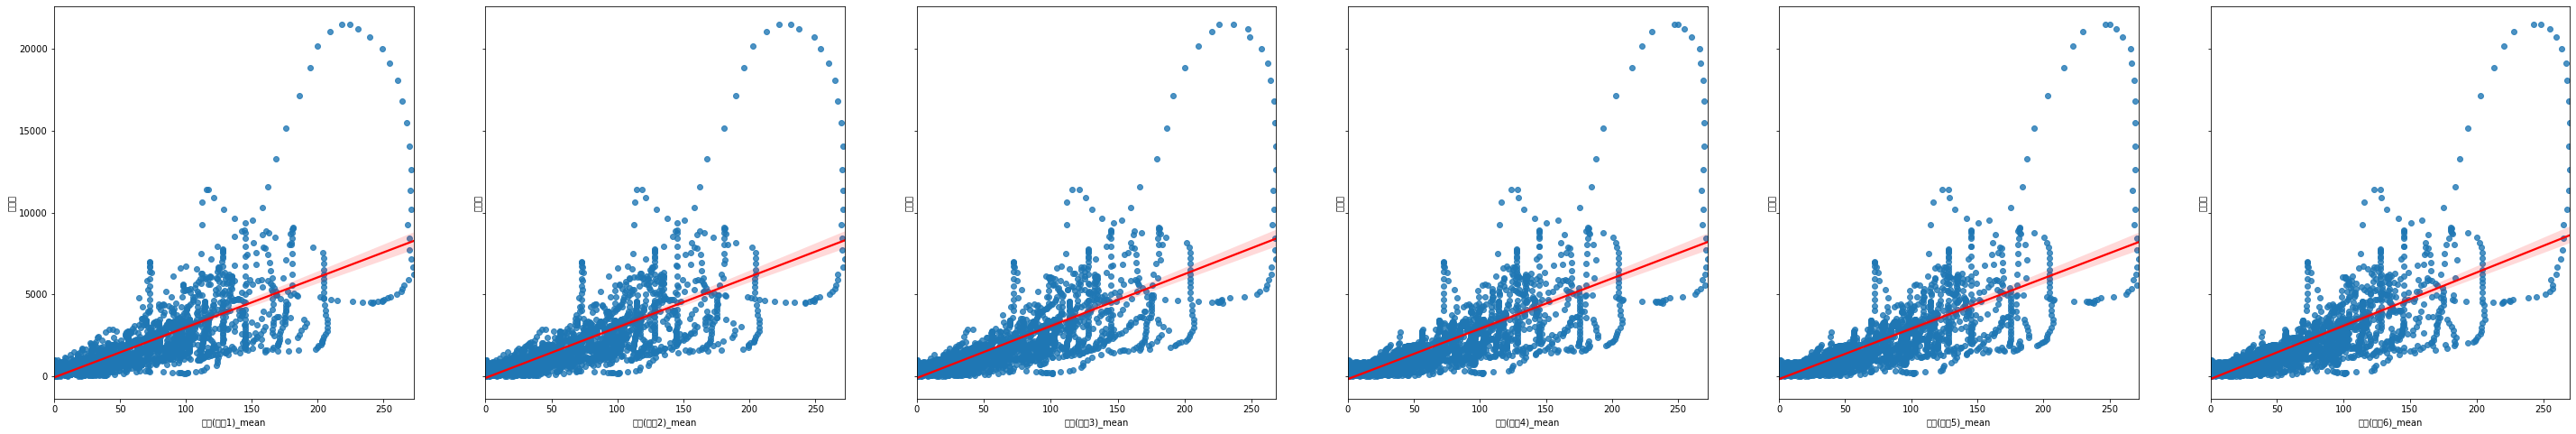

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=6, sharey=True, figsize = (50,8))
sns.regplot(x=train['강우(집단1)_mean'], y=train['유입량'], ax=ax1, line_kws={'color':"red"})
sns.regplot(x=train['강우(집단2)_mean'], y=train['유입량'], ax=ax2, line_kws={'color':"red"})
sns.regplot(x=train['강우(집단3)_mean'], y=train['유입량'], ax=ax3, line_kws={'color':"red"})
sns.regplot(x=train['강우(집단4)_mean'], y=train['유입량'], ax=ax4, line_kws={'color':"red"})
sns.regplot(x=train['강우(집단5)_mean'], y=train['유입량'], ax=ax5, line_kws={'color':"red"})
sns.regplot(x=train['강우(집단6)_mean'], y=train['유입량'], ax=ax6, line_kws={'color':"red"})
#sns.lmplot(x="수위(D지역)_1", y="유입량", data = train, line_kws={'color':"red"})                                                                                                                                                                                                                                                                                

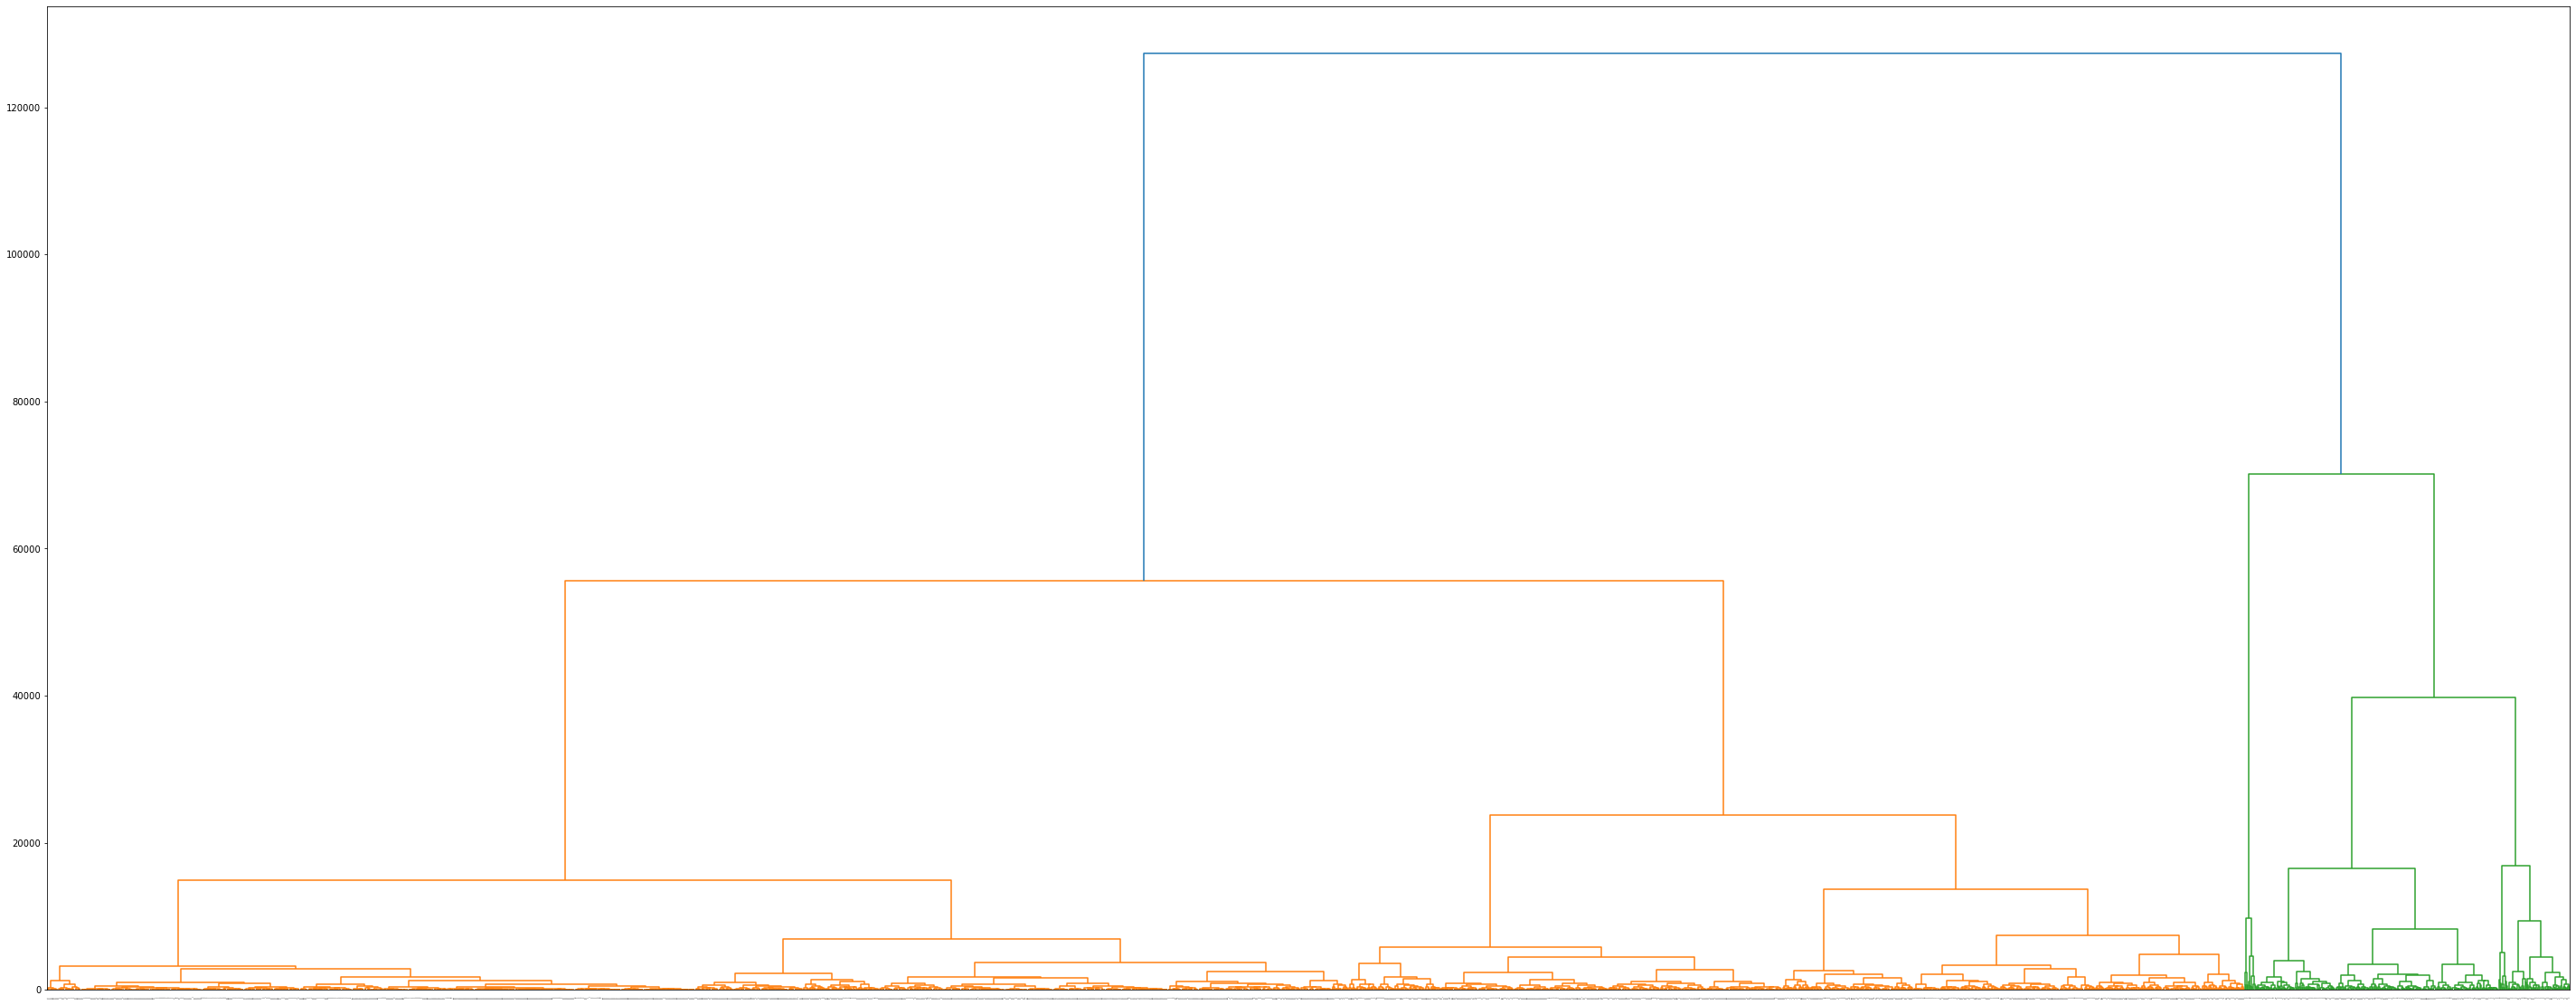

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


feature = train

Z = linkage(feature,'ward')

plt.figure(figsize=(50,20))
dendrogram(Z,
           leaf_rotation=100,
           leaf_font_size=1,
)
plt.show()

In [20]:
def scatter_plot(cnt_srs, color, showlegend1=False, name1 = ""):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        name = name1,
        showlegend=showlegend1,
        marker=dict(
            color=color,
        ),
    )
    return trace

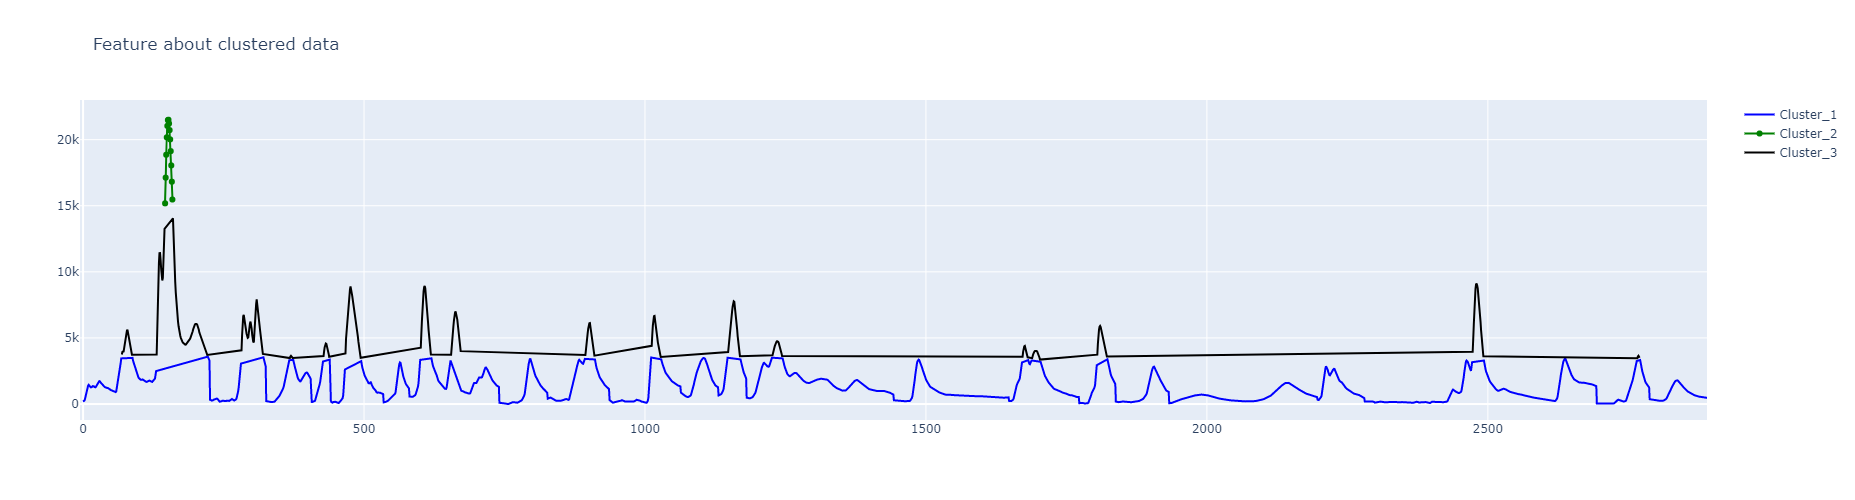

In [21]:
from scipy.cluster.hierarchy import fcluster

k=3
predict=fcluster(Z, k, criterion='maxclust')
feature['cluster']=predict
train2 = train
train2 = pd.merge(train2,feature,on='유입량', how='right')
train_0 = train2[train2['cluster_y'] ==0]
train_1 = train2[train2['cluster_y']==1]
train_2 = train2[train2['cluster_y']==2]
train_3 = train2[train2['cluster_y']==3]
#train_4 = train1[train1['cluster']==4]

cnt_srs_0 = train_0['유입량']
cnt_srs_1 = train_1['유입량']
cnt_srs_2 = train_2['유입량']
cnt_srs_3 = train_3['유입량']
#cnt_srs_4 = train_4.groupby('date')['amount'].mean()

trace_0 = scatter_plot(cnt_srs_0, 'red', True ,'Cluster_0')
trace_1 = scatter_plot(cnt_srs_1, 'blue', True ,'Cluster_1')
trace_2 = scatter_plot(cnt_srs_2, 'green', True ,'Cluster_2')
trace_3 = scatter_plot(cnt_srs_3, 'black', True ,'Cluster_3')
#trace_4 = scatter_plot(cnt_srs_4, 'indigo', True ,'Cluster_4')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='Feature about clustered data'
)

data = [trace_0,trace_1,trace_2, trace_3]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Clustering flood")

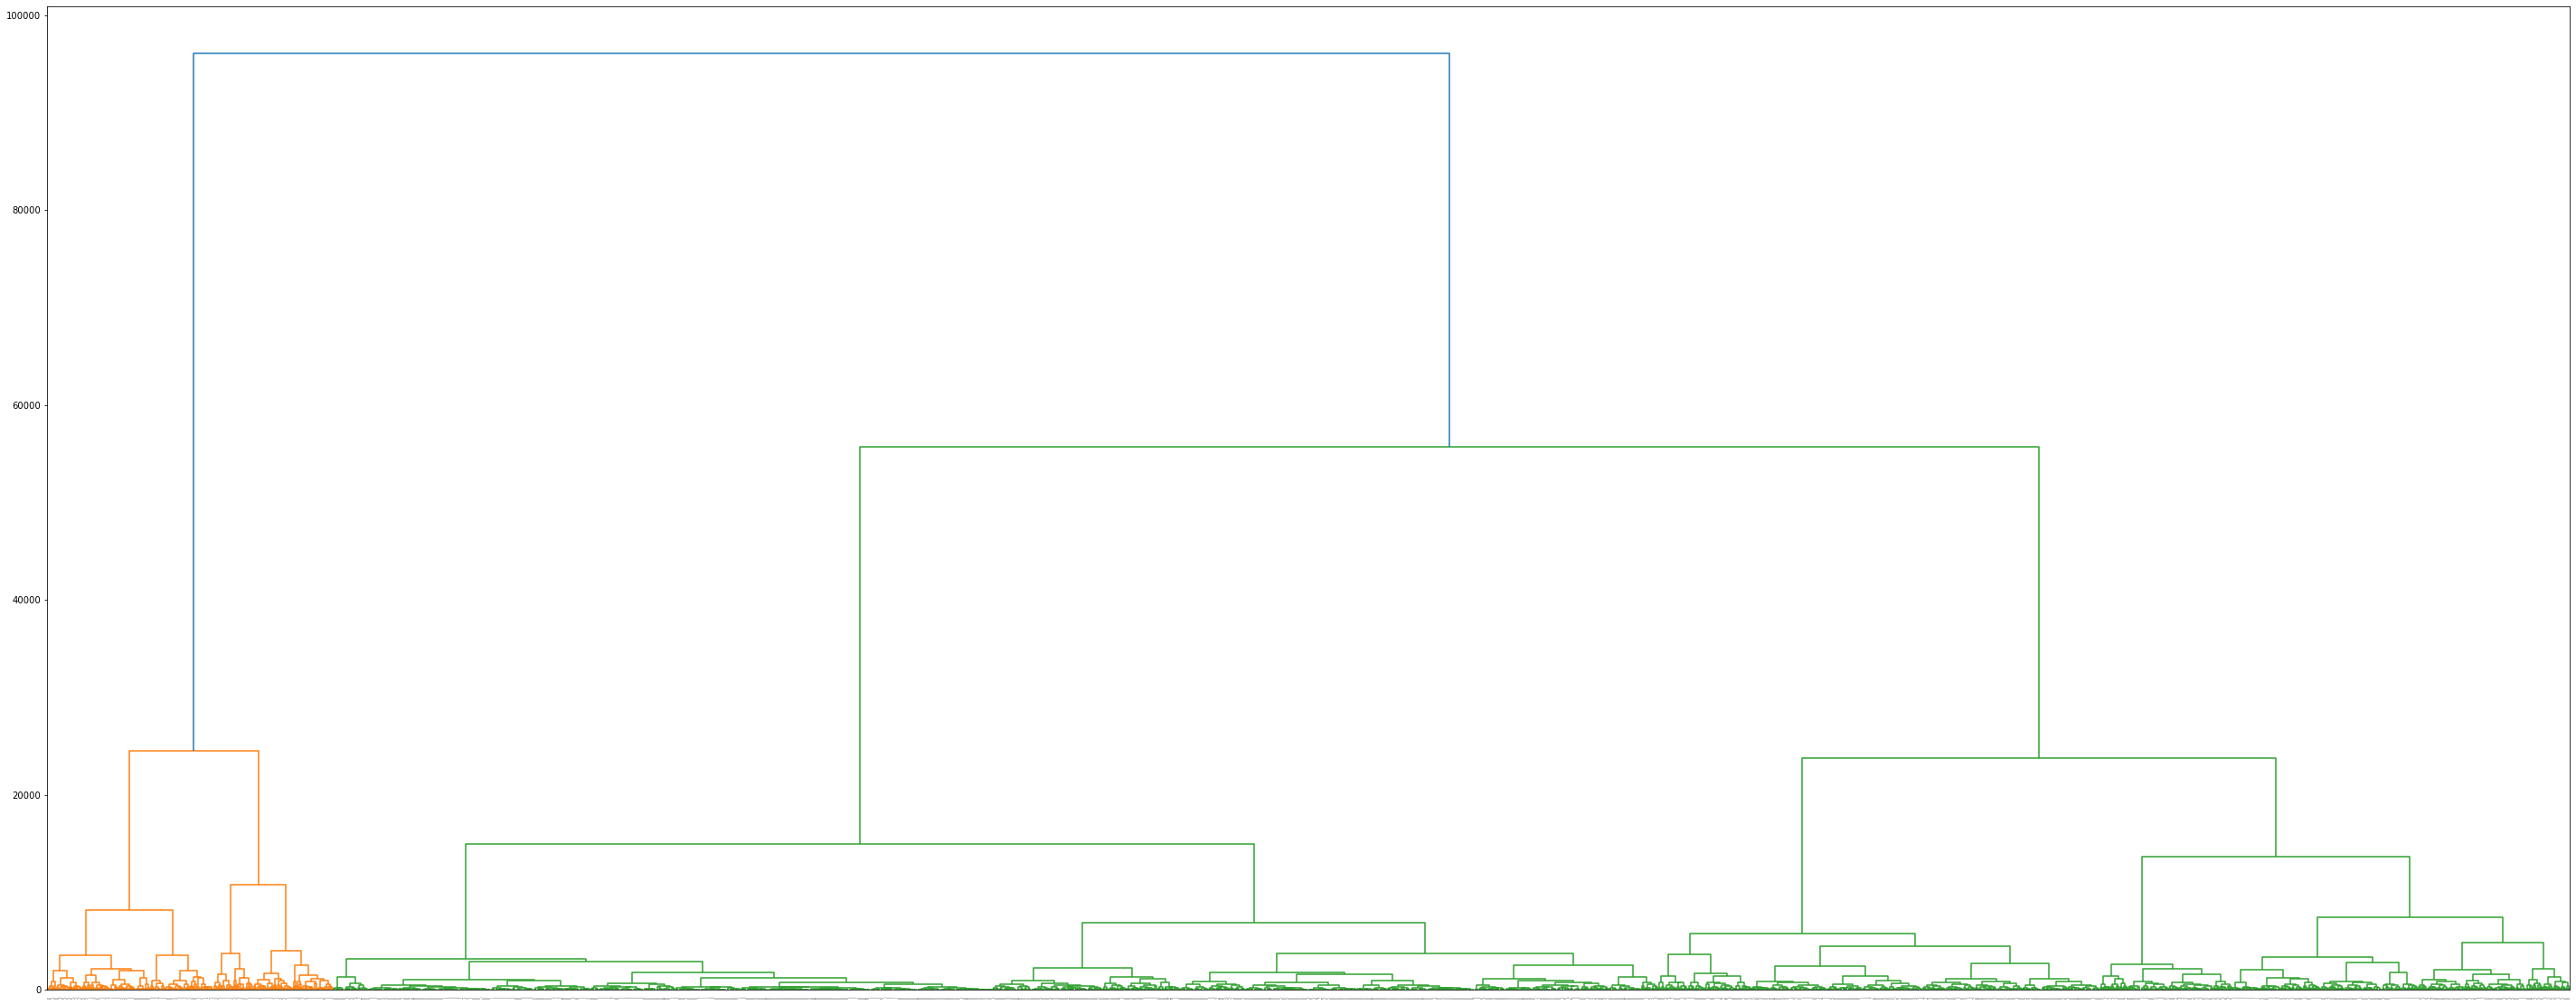

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


feature = train[train['유입량']<8000]

Z = linkage(feature,'ward')

plt.figure(figsize=(50,20))
dendrogram(Z,
           leaf_rotation=100,
           leaf_font_size=1,
)
plt.show()

(0, 109)
(322, 109)
(1491, 109)
(1027, 109)


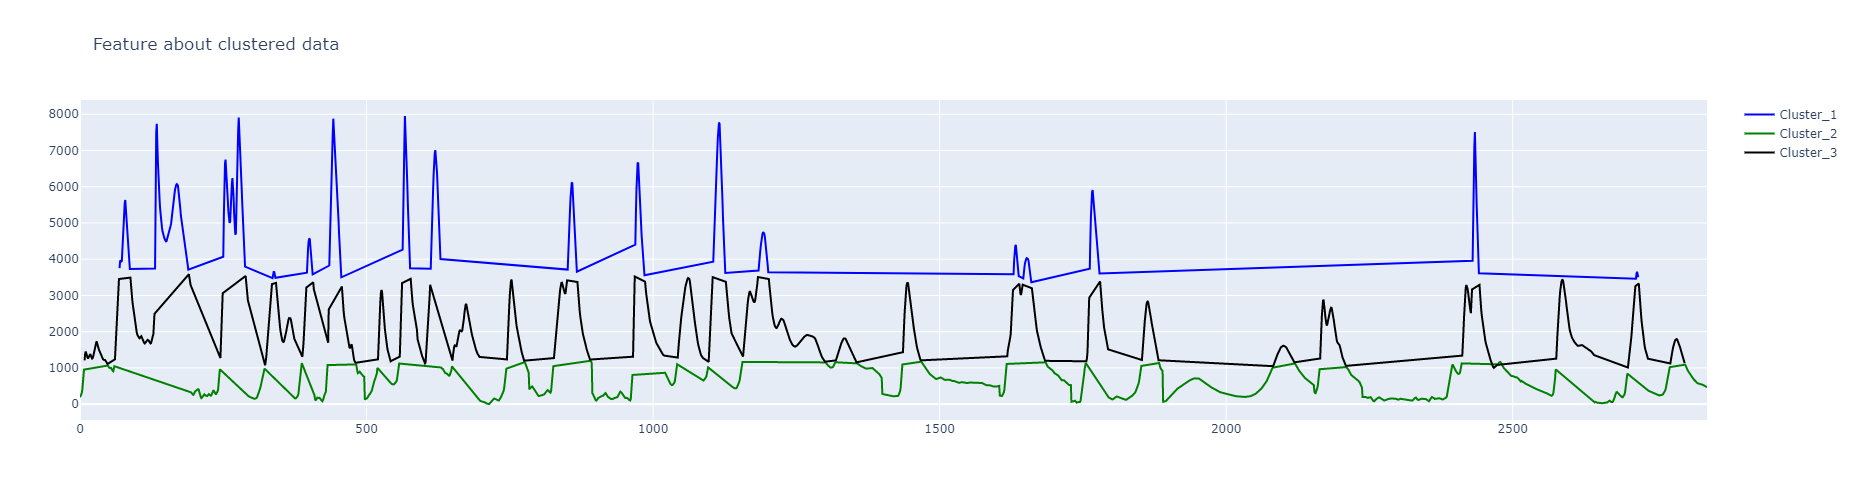

In [23]:
from scipy.cluster.hierarchy import fcluster

k=3
predict=fcluster(Z, k, criterion='maxclust')
feature['cluster']=predict
train1 = train[train['유입량']<8000]
train1 = pd.merge(train1,feature,on='유입량', how='right')
train1 = train1.fillna(0)

train_0 = train1[train1['cluster_y'] ==0]
train_1 = train1[train1['cluster_y']==1]
train_2 = train1[train1['cluster_y']==2]
train_3 = train1[train1['cluster_y']==3]
#train_4 = train1[train1['cluster']==4]
print(train_0.shape)
print(train_1.shape)
print(train_2.shape)
print(train_3.shape)
cnt_srs_0 = train_0['유입량']
cnt_srs_1 = train_1['유입량']
cnt_srs_2 = train_2['유입량']
cnt_srs_3 = train_3['유입량']
#cnt_srs_4 = train_4.groupby('date')['amount'].mean()

trace_0 = scatter_plot(cnt_srs_0, 'red', True ,'Cluster_0')
trace_1 = scatter_plot(cnt_srs_1, 'blue', True ,'Cluster_1')
trace_2 = scatter_plot(cnt_srs_2, 'green', True ,'Cluster_2')
trace_3 = scatter_plot(cnt_srs_3, 'black', True ,'Cluster_3')
#trace_4 = scatter_plot(cnt_srs_4, 'indigo', True ,'Cluster_4')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='Feature about clustered data'
)

data = [trace_0,trace_1,trace_2, trace_3]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Clustering flood")

In [24]:
train = train.drop('cluster', axis=1)

In [27]:
train

,홍수사상번호,연,월,일,시간,유입량,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6,강우(집단1)_mean,강우(집단2)_mean,강우(집단3)_mean,강우(집단4)_mean,강우(집단5)_mean,강우(집단6)_mean
1,1.0,2006,7,10,8,189.100000,6.4000,7.0,7.0,7.0,8.0,2.54,122.56875,6.3000,7.0,7.0,7.0,8.0,2.54,122.541667,6.3000,7.0,7.0,7.0,8.0,2.54,122.550000,6.4000,7.0,7.0,8.0,8.0,2.54,122.675000,6.4000,7.0,7.0,8.0,8.0,2.54,122.660,6.4000,7.0,7.0,8.0,8.0,2.54,122.610,7.25,7.25,7.25,7.50,7.50,7.50
2,1.0,2006,7,10,9,216.951962,6.3000,7.0,8.0,7.0,8.0,2.53,122.56250,6.4000,7.0,8.0,7.0,8.0,2.53,122.550000,6.4000,7.0,8.0,7.0,8.0,2.53,122.558333,7.3000,7.0,8.0,10.0,10.0,2.53,122.667857,7.3000,7.0,8.0,10.0,10.0,2.53,122.648,7.3000,7.0,8.0,10.0,10.0,2.53,122.600,7.50,7.50,7.50,8.75,8.75,8.75
3,1.0,2006,7,10,10,251.424419,6.4000,7.0,9.0,7.0,8.0,2.53,122.55625,7.3000,7.0,9.0,7.0,8.0,2.53,122.558333,7.3000,7.0,9.0,8.0,8.0,2.53,122.566667,8.2000,7.0,9.0,10.0,11.0,2.53,122.660714,8.2000,7.0,9.0,10.0,11.0,2.53,122.636,8.2000,7.0,9.0,10.0,11.0,2.53,122.590,7.75,7.75,8.00,9.25,9.25,9.25
4,1.0,2006,7,10,11,302.812199,7.3000,7.0,10.0,7.0,8.0,2.53,122.55625,8.2000,7.0,10.0,8.0,8.0,2.53,122.566667,8.2000,7.0,10.0,10.0,10.0,2.53,122.575000,11.3000,9.0,10.0,15.0,14.0,2.53,122.653571,11.3000,9.0,10.0,15.0,14.0,2.53,122.620,11.3000,9.0,10.0,15.0,14.0,2.53,122.585,8.00,8.25,9.25,12.00,12.00,12.00
5,1.0,2006,7,10,12,384.783406,8.2000,7.0,12.0,8.0,10.0,2.53,122.55625,11.3000,9.0,12.0,10.0,10.0,2.53,122.575000,11.3000,9.0,12.0,10.0,11.0,2.53,122.575000,14.4000,12.0,12.0,18.0,16.0,2.53,122.639286,14.4000,12.0,12.0,18.0,16.0,2.53,122.604,14.4000,12.0,12.0,18.0,16.0,2.53,122.575,9.25,10.25,10.50,14.50,14.50,14.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,25.0,2017,7,18,18,513.368437,22.7836,6.0,0.0,1.0,1.0,3.03,137.16875,8.2586,6.0,0.0,1.0,1.0,3.03,137.200000,8.2586,6.0,0.0,1.0,1.0,3.03,137.200000,4.1089,6.0,0.0,1.0,1.0,3.03,137.050000,3.2841,6.0,0.0,1.0,1.0,3.03,137.088,1.7366,6.0,0.0,1.0,1.0,3.03,137.130,2.00,2.00,2.00,2.00,2.00,2.00
2888,25.0,2017,7,18,19,502.846843,8.2586,2.0,0.0,1.0,1.0,3.00,137.18125,4.1089,2.0,0.0,1.0,1.0,3.00,137.200000,4.1089,2.0,0.0,1.0,1.0,3.00,137.200000,3.3854,2.0,0.0,1.0,1.0,3.00,137.067857,2.7514,2.0,0.0,1.0,1.0,3.00,137.104,1.7366,2.0,0.0,1.0,1.0,3.00,137.145,1.00,1.00,1.00,1.00,1.00,1.00
2889,25.0,2017,7,18,20,491.954805,4.1089,1.0,0.0,1.0,1.0,2.98,137.18750,3.3854,1.0,0.0,1.0,1.0,2.98,137.200000,3.3854,1.0,0.0,1.0,1.0,2.98,137.200000,3.2841,1.0,0.0,1.0,1.0,2.98,137.085714,2.1142,1.0,0.0,1.0,1.0,2.98,137.120,1.7366,1.0,0.0,1.0,1.0,2.98,137.155,0.75,0.75,0.75,0.75,0.75,0.75
2890,25.0,2017,7,18,21,481.103083,3.3854,1.0,0.0,1.0,1.0,2.96,137.19375,3.2841,1.0,0.0,1.0,1.0,2.96,137.200000,3.2841,1.0,0.0,1.0,1.0,2.96,137.208333,2.7514,1.0,0.0,1.0,1.0,2.96,137.103571,1.8734,1.0,0.0,1.0,1.0,2.96,137.136,1.7366,1.0,0.0,1.0,1.0,2.96,137.165,0.75,0.75,0.75,0.75,0.75,0.75


Training until validation scores don't improve for 30 rounds
[100]	valid_0's rmse: 161.884	valid_0's l2: 26206.5	valid_1's rmse: 361.102	valid_1's l2: 130394
[200]	valid_0's rmse: 92.8194	valid_0's l2: 8615.45	valid_1's rmse: 291.794	valid_1's l2: 85143.5
[300]	valid_0's rmse: 66.9271	valid_0's l2: 4479.24	valid_1's rmse: 271.36	valid_1's l2: 73636.4
[400]	valid_0's rmse: 53.35	valid_0's l2: 2846.23	valid_1's rmse: 261.425	valid_1's l2: 68343.2
[500]	valid_0's rmse: 43.8898	valid_0's l2: 1926.31	valid_1's rmse: 253.105	valid_1's l2: 64062.3
[600]	valid_0's rmse: 36.4034	valid_0's l2: 1325.2	valid_1's rmse: 246.416	valid_1's l2: 60720.8
[700]	valid_0's rmse: 30.8013	valid_0's l2: 948.718	valid_1's rmse: 242.465	valid_1's l2: 58789.1
[800]	valid_0's rmse: 25.8854	valid_0's l2: 670.053	valid_1's rmse: 238.736	valid_1's l2: 56995
[900]	valid_0's rmse: 22.3077	valid_0's l2: 497.634	valid_1's rmse: 236.934	valid_1's l2: 56137.9
[1000]	valid_0's rmse: 19.2677	valid_0's l2: 371.245	valid_1's r

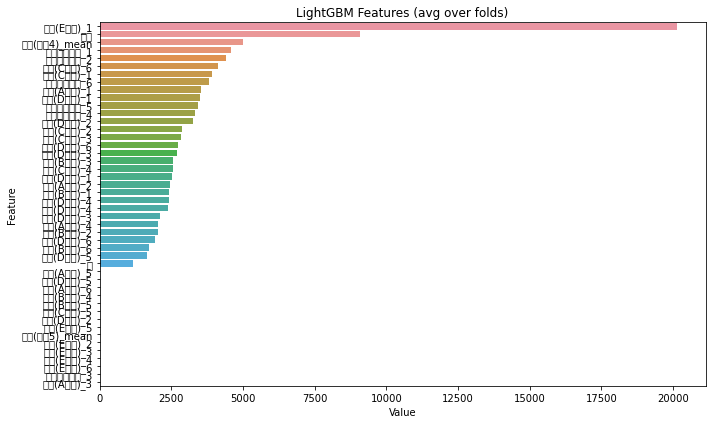

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

target = '유입량'
cols_to_drop = ['홍수사상번호','시간''일','월','연', target, '강우(집단1)_mean', '강우(집단1)_mean', '강우(집단2)_mean', '강우(집단3)_mean', '강우(집단4)_mean''강우(집단5)_mean', '강우(집단6)_mean']
cols_to_fit = [col for col in train.columns if col not in cols_to_drop]
train1, val1 = train_test_split(train, test_size=0.2, random_state=42)

from lightgbm import LGBMRegressor
params = {
    'n_estimators': 10000000, 
    'metric': 'mse',
    'verbose': -1,
}

model = LGBMRegressor(**params)
model.fit(
    train1[cols_to_fit], train1[target],
    eval_set=[(train1[cols_to_fit], train1[target]),(val1[cols_to_fit], val1[target])],
    eval_metric='rmse',
    early_stopping_rounds = 30,
    verbose=100,
)

feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [30]:
import eli5
from eli5.sklearn import PermutationImportance

train1 = train.fillna(-1)
train1, val1 = train_test_split(train1, test_size=0.3, random_state=0)

perm = PermutationImportance(model, random_state=42).fit(val1[cols_to_fit], val1[target])
eli5.show_weights(perm, feature_names=list(cols_to_fit))

Weight,Feature
1.2028 ± 0.0758,수위(E지역)_1
0.0294 ± 0.0027,강우(C지역)_6
0.0273 ± 0.0024,강우(C지역)_1
0.0261 ± 0.0022,강우(C지역)_4
0.0208 ± 0.0018,강우(D지역)_6
0.0153 ± 0.0036,강우(B지역)_3
0.0134 ± 0.0031,일
0.0127 ± 0.0019,수위(D지역)_4
0.0122 ± 0.0010,강우(집단4)_mean
0.0099 ± 0.0012,유역평균강수_5


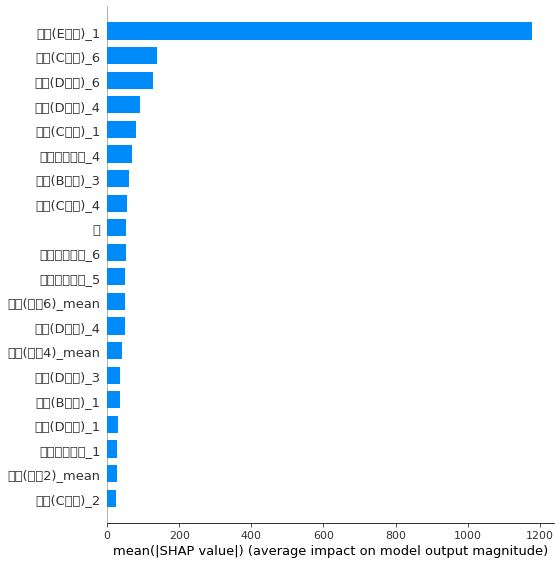

In [32]:
import shap 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(val1[cols_to_fit])
shap.summary_plot(shap_values, val1[cols_to_fit], plot_type='bar')

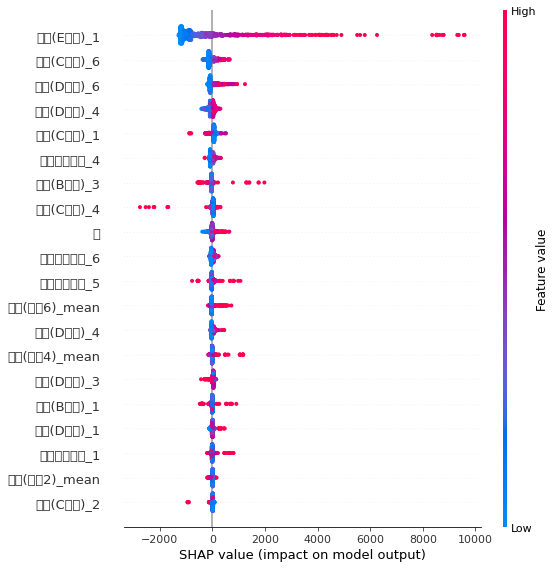

In [33]:
shap.summary_plot(shap_values, val1[cols_to_fit], feature_names=cols_to_fit)

확인한점
====

1. 유입량이 8000이 넘어가는 데이터의 경우 1.7% 7000이 넘어가는 데이터의 경우 2.5% 6000이 넘어가는 경우 4.2%
2. 홍수사상번호 1번에 해당하는 경우 유입량이 매우 많은 경우가 다수 존재(8000이상의 데이터 중 약62% 차지)
3. 이전 확인한 것처럼 유입량이 많은 데이터는 많은 강우와 유역평균강수 값을 가짐
4. 각 데이터 집단의 강우량 평균과 유입량의 추세선을 확인하면 거의 유사한 결과가 나오는 것을 알 수 있음.
5. 8000을 기준으로 클러스터링 진행시 하지 않은 것과 cluster에서 차이가 나타남
6. 데이터 학습 시 기존 raw 데이터에서는 첫번째 집단 E지역 수위가 중요하게 나타남

추가 진행 계획
====
1. 클러스터링 분류에 따라서 각각의 학습모델로 예측 할 수 있도록 코드 작성
2. 데이터 차원 줄이기

성능
=====

train/valid 80/20 비율로 나눈 후 평가진행  
1. RAW 데이터에 대한 예측 Train RMSE = 1.51186 Valid RMSE = 227.304